In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from pandas import Series
from numpy.random import randn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from uszipcode import search
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble, tree, linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('../../../data/kc_house_data.csv')
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df = pd.read_csv('../../../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df[df.columns[1:]].corr()['price'][:]

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.276295
view             0.395734
condition        0.036056
grade            0.667951
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [6]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [7]:
df[df.columns[1:]].corr()['price'][:]

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.276295
view             0.395734
condition        0.036056
grade            0.667951
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
df = df.drop('date', 1)

In [10]:
df['waterfront'].fillna(0.0, inplace = True)

In [11]:
df.isnull().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
df['view'].fillna(0.0, inplace = True)

In [13]:
df.isnull().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
df['yr_renovated'].fillna(0.0, inplace = True)

In [15]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
df["sqft_basement"] = pd.to_numeric(df.sqft_basement, errors='coerce')

In [18]:
df.isnull().sum()

id                 0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    454
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [19]:
df['sqft_basement'].fillna(0.0, inplace = True)

In [20]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [21]:
def getcity(zipcode):
    if (zipcode == 98002) or (zipcode == 98092):
        return 'Auburn'
    elif(zipcode == 98224):
        return 'Baring'
    elif(zipcode == 98004) or (zipcode == 98005) or (zipcode == 98006) or (zipcode == 98007) or (zipcode == 98008):
        return 'Bellevue'
    elif(zipcode == 98010):
        return 'Black Diamond'
    elif(zipcode == 98011):
        return 'Bothell'
    elif(zipcode == 98178):
        return 'Bryn Mawr-Skyway'
    elif(zipcode == 98148) or (zipcode == 98166):
        return 'Burien'
    elif(zipcode == 98014):
        return 'Carnation'
    elif(zipcode == 98077):
        return 'Cottage Lake'
    elif(zipcode == 98042):
        return 'Covington'
    elif(zipcode == 98198):
        return 'Des Moines'
    elif(zipcode == 98019):
        return 'Duvall'
    elif(zipcode == 98031):
        return 'East Hill-Meridian'
    elif(zipcode == 98022):
        return 'Enumclaw'
    elif(zipcode == 98058):
        return 'Fairwood'
    elif(zipcode ==98024):
        return 'Fall city'
    elif(zipcode == 98003) or (zipcode == 98023):
        return 'Federal Way'
    elif(zipcode == 98027) or (zipcode == 98029):
        return 'Issaquah'
    elif(zipcode == 98028):
        return 'Kenmore'
    elif(zipcode == 98032) or (zipcode == 98030):
        return 'Kent'
    elif(zipcode == 98033) or (zipcode == 98034):
        return 'Kirkland'
    elif (zipcode == 98001):
        return 'Lakeland North'
    elif(zipcode == 98038):
        return 'Maple Valley'
    elif(zipcode == 98039):
        return 'Medina'
    elif(zipcode == 98040):
        return 'Mercer Island'
    elif(zipcode == 98045):
        return 'North Bend'
    elif(zipcode == 98047):
        return 'Pacific'
    elif(zipcode == 98050):
        return 'Preston'
    elif(zipcode == 98051):
        return 'Ravensdale'
    elif(zipcode == 98052):
        return 'Redmond'
    elif(zipcode == 98055) or (zipcode == 98056) or(zipcode == 98057) or (zipcode == 98059):
        return 'Renton'
    elif(zipcode == 98074) or (zipcode == 98075):
        return 'Sammamish'
    elif (zipcode == 98188):
        return 'SeaTac'
    elif (zipcode == 98155) or (zipcode == 98177):
        return 'Shoreline'
    elif (zipcode == 98288):
        return 'Skykomish'
    elif (zipcode == 98065):
        return 'Snoqualmie'
    elif (zipcode == 98168):
        return 'Tukwila'
    elif (zipcode == 98053):
        return 'Union Hill-Novelty Hill'
    elif (zipcode == 98195):
        return 'Univ Of Washington'
    elif (zipcode == 98070):
        return 'Vashon'
    elif (zipcode == 98146):
        return 'White Center'
    elif (zipcode == 98072):
        return 'Woodinville'
    else:
        return 'Seattle'
    
    
city = df.zipcode.apply(getcity)
df['city'] = city
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Bryn Mawr-Skyway
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,Seattle
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,White Center
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,Seattle
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,Issaquah


In [22]:
dummy = pd.get_dummies(df['city'])
dummy

,Auburn,Bellevue,Black Diamond,Bothell,Bryn Mawr-Skyway,Burien,Carnation,Cottage Lake,Covington,Des Moines,...,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Union Hill-Novelty Hill,Vashon,White Center,Woodinville
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df = pd.concat([df, dummy], axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Union Hill-Novelty Hill,Vashon,White Center,Woodinville
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,0,1,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,0,0


In [24]:
df = df.merge(dummy, left_index=True, right_index=True)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Sammamish_y,SeaTac_y,Seattle_y,Shoreline_y,Snoqualmie_y,Tukwila_y,Union Hill-Novelty Hill_y,Vashon_y,White Center_y,Woodinville_y
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,0,1,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,0,0,1,0,0,0,0,0,0,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,1,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,0,0,1,0,0,0,0,0,0,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df = df.drop('zipcode', 1)
df = df.drop('city', 1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21597 non-null  int64  
 1   price                      21597 non-null  float64
 2   bedrooms                   21597 non-null  int64  
 3   bathrooms                  21597 non-null  float64
 4   sqft_living                21597 non-null  int64  
 5   sqft_lot                   21597 non-null  int64  
 6   floors                     21597 non-null  float64
 7   waterfront                 21597 non-null  float64
 8   view                       21597 non-null  float64
 9   condition                  21597 non-null  int64  
 10  grade                      21597 non-null  int64  
 11  sqft_above                 21597 non-null  int64  
 12  sqft_basement              21597 non-null  float64
 13  yr_built                   21597 non-null  int

# R-squared value after creating cities

In [27]:
model2 = LinearRegression()
X = df.drop('price', axis = 1)
y = df['price']

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)
model2.fit(X_train, y_train)

model2.score(X_test, y_test)

0.7724970586246123

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21597 non-null  int64  
 1   price                      21597 non-null  float64
 2   bedrooms                   21597 non-null  int64  
 3   bathrooms                  21597 non-null  float64
 4   sqft_living                21597 non-null  int64  
 5   sqft_lot                   21597 non-null  int64  
 6   floors                     21597 non-null  float64
 7   waterfront                 21597 non-null  float64
 8   view                       21597 non-null  float64
 9   condition                  21597 non-null  int64  
 10  grade                      21597 non-null  int64  
 11  sqft_above                 21597 non-null  int64  
 12  sqft_basement              21597 non-null  float64
 13  yr_built                   21597 non-null  int

In [29]:
dropped = df.drop([ 'id', 'price', 'waterfront', 'sqft_above', 'sqft_basement'], axis=1)

In [30]:
dropped

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,yr_renovated,...,Sammamish_y,SeaTac_y,Seattle_y,Shoreline_y,Snoqualmie_y,Tukwila_y,Union Hill-Novelty Hill_y,Vashon_y,White Center_y,Woodinville_y
0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,...,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,...,0,0,1,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0.0,3,8,2009,0.0,...,0,0,1,0,0,0,0,0,0,0
21593,4,2.50,2310,5813,2.0,0.0,3,8,2014,0.0,...,0,0,0,0,0,0,0,0,1,0
21594,2,0.75,1020,1350,2.0,0.0,3,7,2009,0.0,...,0,0,1,0,0,0,0,0,0,0
21595,3,2.50,1600,2388,2.0,0.0,3,8,2004,0.0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Sammamish_y,SeaTac_y,Seattle_y,Shoreline_y,Snoqualmie_y,Tukwila_y,Union Hill-Novelty Hill_y,Vashon_y,White Center_y,Woodinville_y
9399,7857003851,4,2.00,2310,5004,1.0,0.0,0.0,3,7,...,0,0,1,0,0,0,0,0,0,0
1213,2095800400,3,2.50,2090,8653,2.0,0.0,0.0,3,8,...,0,0,0,0,0,0,0,0,0,0
3273,3876311390,3,2.25,2090,9163,1.0,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0
18001,3902300450,4,2.50,2190,9880,1.0,0.0,0.0,4,8,...,0,0,0,0,0,0,0,0,0,0
7601,4077800026,4,1.75,3420,7200,1.0,0.0,3.0,5,8,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,7657600005,5,2.00,1730,7375,1.0,0.0,0.0,4,6,...,0,0,0,0,0,0,0,0,0,0
3776,8635700025,3,1.75,1630,15600,1.0,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0
6215,4222310290,4,2.00,1910,7826,1.0,0.0,0.0,4,7,...,0,0,0,0,0,0,0,0,0,0
4695,6648150090,4,4.00,4050,9517,2.0,0.0,0.0,3,11,...,0,0,0,0,0,0,0,0,0,0


# Model with cities

In [32]:
y_train

9399      440000.0
1213      455000.0
3273      456500.0
18001     630000.0
7601      715000.0
           ...    
15611     249950.0
3776      522000.0
6215      253000.0
4695     1200000.0
9651      657500.0
Name: price, Length: 16197, dtype: float64

In [33]:
# Isolate the features for the first model
model_2_train = X_train[dropped.columns]

model_2_test = X_test[dropped.columns]

# Initialize a model
model2 = LinearRegression()

# Fit the model
model2.fit(model_2_train, y_train)


# Generate training and test predictions
train_preds = model2.predict(model_2_train)
test_preds = model2.predict(model_2_test)

# Calculate training and test error
train_error = np.sqrt(mean_squared_error(y_train, train_preds))
test_error = np.sqrt(mean_squared_error(y_test, test_preds))

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)
print('Intercept:', model2.intercept_)

Train error: 186501.87928697112
Test error: 191743.12739431232
Difference: 5241.2481073412055
Intercept: -53964003.27566139


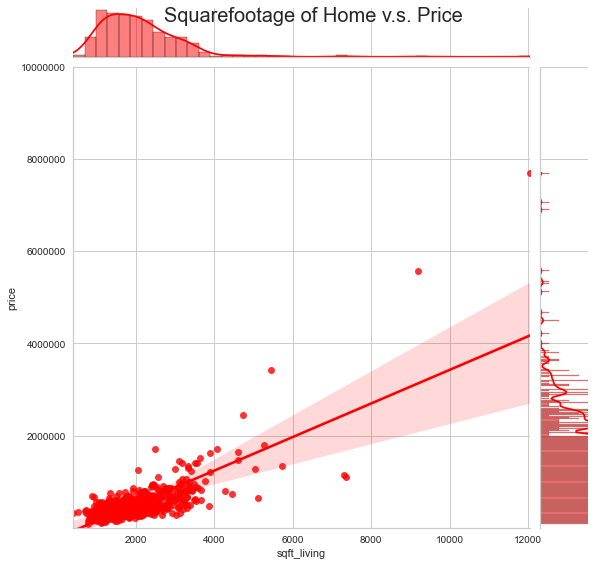

In [34]:
ax = sns.jointplot(x = model_2_train['sqft_living'].sample(n=500, random_state=2021), y=y, kind='reg', color='red', height=8, ratio=8)
plt.suptitle('Squarefootage of Home v.s. Price', fontsize = 20)
plt.xlabel('Squarefootage of Home', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.tick_params(labelsize=12)
plt.ticklabel_format(style='plain')
plt.xlim(0,5)
plt.ylim(1000, 10000000);

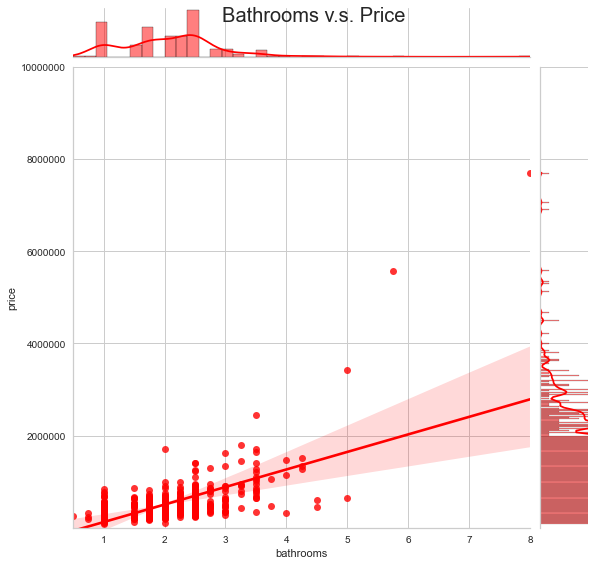

In [35]:
ax = sns.jointplot(x = model_2_train['bathrooms'].sample(n=500, random_state=2021), y=y, kind='reg', color='red', height=8, ratio=8)
plt.suptitle('Bathrooms v.s. Price', fontsize = 20)
plt.xlabel('Squarefootage of Home', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.tick_params(labelsize=12)
plt.ticklabel_format(style='plain')
plt.xlim(0,5)
plt.ylim(100, 10000000);

# Model and R-squared with log price

In [36]:
df['log_price'] = np.log(df['price'])

In [37]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,SeaTac_y,Seattle_y,Shoreline_y,Snoqualmie_y,Tukwila_y,Union Hill-Novelty Hill_y,Vashon_y,White Center_y,Woodinville_y,log_price
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,12.309982
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,0,1,0,0,0,0,0,0,0,13.195614
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,12.100712
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,1,0,0,0,0,0,0,0,13.311329
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,13.142166


In [38]:
model3 = LinearRegression()
X = df.drop(['price', 'log_price'], axis = 1)
y = df['log_price']

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)
model3.fit(X_train, y_train)

model3.score(X_test, y_test)

0.8387285935847796

In [39]:
dropped2 = df.drop(['id', 'price', 'waterfront', 'sqft_above', 'sqft_basement', 'log_price'], axis=1)

In [40]:
model_3_train = X_train[dropped2.columns]

model_3_test = X_test[dropped2.columns]

# Initialize a model
model3 = LinearRegression()

# Fit the model
model3.fit(model_3_train, y_train)


# Generate training and test predictions
train_preds = model3.predict(model_3_train)
test_preds = model3.predict(model_3_test)

# Calculate training and test error
train_error = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(train_preds)))
test_error = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(test_preds)))

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)
print('Intercept:', model3.intercept_)

Train error: 199461.08976888872
Test error: 169833.3266041933
Difference: -29627.76316469541
Intercept: -95.20788838333878


Model with boolean values for whether or not house has basement

In [41]:
df['basement'] = df['sqft_basement'] > 0
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Seattle_y,Shoreline_y,Snoqualmie_y,Tukwila_y,Union Hill-Novelty Hill_y,Vashon_y,White Center_y,Woodinville_y,log_price,basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,12.309982,False
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,13.195614,True
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,12.100712,False
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1,0,0,0,0,0,0,0,13.311329,True
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,13.142166,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,12.793859,False
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,0,0,0,0,0,0,1,0,12.899220,False
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,12.904459,False
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,12.899220,False


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21597 non-null  int64  
 1   price                      21597 non-null  float64
 2   bedrooms                   21597 non-null  int64  
 3   bathrooms                  21597 non-null  float64
 4   sqft_living                21597 non-null  int64  
 5   sqft_lot                   21597 non-null  int64  
 6   floors                     21597 non-null  float64
 7   waterfront                 21597 non-null  float64
 8   view                       21597 non-null  float64
 9   condition                  21597 non-null  int64  
 10  grade                      21597 non-null  int64  
 11  sqft_above                 21597 non-null  int64  
 12  sqft_basement              21597 non-null  float64
 13  yr_built                   21597 non-null  int

# Categorical to dummy (bathrooms and grade)

In [43]:
dummy_bathrooms = pd.get_dummies(df['bathrooms'])
dummy_bathrooms

,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,...,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.50,7.75,8.00
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21594,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df = pd.concat([df, dummy_bathrooms], axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,5.25,5.5,5.75,6.0,6.25,6.5,6.75,7.5,7.75,8.0
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df = df.drop('bathrooms', axis=1)

In [46]:
dummy_grade = pd.get_dummies(df['grade'])
dummy_grade

,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,1,0,0,0,0,0
21593,0,0,0,0,0,1,0,0,0,0,0
21594,0,0,0,0,1,0,0,0,0,0,0
21595,0,0,0,0,0,1,0,0,0,0,0


In [47]:
df = pd.concat([df, dummy_grade], axis=1)
df.head()

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,4,5,6,7,8,9,10,11,12,13
0,7129300520,221900.0,3,1180,5650,1.0,0.0,0.0,3,7,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,538000.0,3,2570,7242,2.0,0.0,0.0,3,7,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,180000.0,2,770,10000,1.0,0.0,0.0,3,6,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,1960,5000,1.0,0.0,0.0,5,7,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,1680,8080,1.0,0.0,0.0,3,8,...,0,0,0,0,1,0,0,0,0,0


In [48]:
df = df.drop('grade', axis=1)

In [65]:
X

,id,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,4,5,6,7,8,9,10,11,12,13
0,7129300520,3,1180,5650,1.0,0.0,0.0,3,1180,0.0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,3,2570,7242,2.0,0.0,0.0,3,2170,400.0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2,770,10000,1.0,0.0,0.0,3,770,0.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,4,1960,5000,1.0,0.0,0.0,5,1050,910.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,3,1680,8080,1.0,0.0,0.0,3,1680,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,1530,1131,3.0,0.0,0.0,3,1530,0.0,...,0,0,0,0,1,0,0,0,0,0
21593,6600060120,4,2310,5813,2.0,0.0,0.0,3,2310,0.0,...,0,0,0,0,1,0,0,0,0,0
21594,1523300141,2,1020,1350,2.0,0.0,0.0,3,1020,0.0,...,0,0,0,1,0,0,0,0,0,0
21595,291310100,3,1600,2388,2.0,0.0,0.0,3,1600,0.0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
model4 = LinearRegression()
X = df.drop(['price', 'log_price'], axis = 1)
y = df['log_price']

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)
model4.fit(X_train, y_train)

model4.score(X_test, y_test)

0.8430191924228629

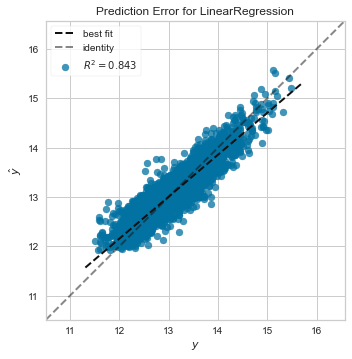

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [66]:
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [59]:
df.head()

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,4,5,6,7,8,9,10,11,12,13
0,7129300520,221900.0,3,1180,5650,1.0,0.0,0.0,3,1180,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,538000.0,3,2570,7242,2.0,0.0,0.0,3,2170,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,180000.0,2,770,10000,1.0,0.0,0.0,3,770,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,1960,5000,1.0,0.0,0.0,5,1050,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,1680,8080,1.0,0.0,0.0,3,1680,...,0,0,0,0,1,0,0,0,0,0


In [64]:
model_4_train.columns

NameError: name 'model_4_train' is not defined

In [68]:
model_4_train = X_train[df.columns]

model_4_test = X_test[df]

# Initialize a model
model4 = LinearRegression()

# Fit the model
model4.fit(model_4_train, y_train)


# Generate training and test predictions
train_preds = model4.predict(model_4_train)
test_preds = model4.predict(model_4_test)

# Calculate training and test error
train_error = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(train_preds)))
test_error = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(test_preds)))

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)
print('Intercept:', model4.intercept_)

KeyError: "['price', 'log_price'] not in index"

# Gradient Boost model

In [ ]:
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

In [ ]:
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    print('Train')
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [ ]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(GBest, X_train, X_test, y_train, y_test)

In [ ]:
scores = cross_val_score(GBest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))